In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')
import utils_auto 

# Configuration

In [3]:
trial_idx=3
paper='1106.6060'

# Code-generation prompts

In [4]:
prompt=(utils_auto.generate_prompt(template='prompt.md',docstring='docstring.md',paper=paper,save=True,trial_idx=trial_idx))

In [5]:
print(prompt)

You are a condensed matter physicist working on the numerical calculation for the Hamiltonian of a system using the Hartree Fock method. I will provide you with the physical Hamitonian written in second quantized form as an equation in LaTeX. You should convert it into a class for the HartreeFockHamiltonian using Python and necessary packages, such as numpy and scipy.
This is a multiple-step problem, and you will execute this process by analyzing the equation and answering smaller questions sequentially in order to finally generate the class. The class has the following structure:

CLASS DOCSTRING: 
```
class HartreeFockHamiltonian:
  def __init__(self, N_shell, parameters:dict[str, Any], filling_factor: float=0.5):
    self.lattice = 'square' | 'triangular'
    self.D = # LLM Task: has to define this tuple.
    self.basis_order = {'0': 'flavor_type_0', '1': 'flavor_type_1', ... 'D-1': 'flavor_type_D-1'}
    # this is the basis order that the Hamiltonian will follow

    # Occupancy re

# LLM-Generated code

In [6]:
generated_code = utils_auto.code_generate(prompt,max_tokens=25600,budget_tokens=12800,)


#################### THINKING ####################

Let's break down this Hamiltonian to understand its structure and identify all the necessary components for the Hartree-Fock implementation.

First, I'll identify the dimension (D) of the system, the basis order, and separate the interacting and non-interacting terms.

### QUESTION 1: Dimension and Basis Order
Looking at the Hamiltonian, we have:

$\hat{C}^{\dag}_{\kk s} = (\hat{p}^{\dag}_{x\kk s}, \hat{p}^{\dag}_{y\kk s}, \hat{d}^{\dag}_{\kk s})$

This indicates we have three orbitals (p_x, p_y, d) and spin s. So we have a 3-orbital, 2-spin system, making D = (2, 3) where the first dimension is for spin (up, down) and the second is for the orbital type (p_x, p_y, d).

Basis Order:
0: spin. Order: up, down
1: orbital. Order: p_x, p_y, d

### QUESTION 2: Identifying Interacting Terms
Looking at the Hamiltonian, we need to identify what depends on expectation values (`exp_val`):

We have:
1. $n^p$ - The total density of holes on oxygen

In [7]:
print(generated_code['thinking'])

Let's break down this Hamiltonian to understand its structure and identify all the necessary components for the Hartree-Fock implementation.

First, I'll identify the dimension (D) of the system, the basis order, and separate the interacting and non-interacting terms.

### QUESTION 1: Dimension and Basis Order
Looking at the Hamiltonian, we have:

$\hat{C}^{\dag}_{\kk s} = (\hat{p}^{\dag}_{x\kk s}, \hat{p}^{\dag}_{y\kk s}, \hat{d}^{\dag}_{\kk s})$

This indicates we have three orbitals (p_x, p_y, d) and spin s. So we have a 3-orbital, 2-spin system, making D = (2, 3) where the first dimension is for spin (up, down) and the second is for the orbital type (p_x, p_y, d).

Basis Order:
0: spin. Order: up, down
1: orbital. Order: p_x, p_y, d

### QUESTION 2: Identifying Interacting Terms
Looking at the Hamiltonian, we need to identify what depends on expectation values (`exp_val`):

We have:
1. $n^p$ - The total density of holes on oxygen sites (from expectation values of p_x and p_y orbita

In [8]:
print(generated_code['text'])

# Analysis of the Emery Model Hamiltonian

## QUESTION 1: Dimension and Basis Order

Tuple of Flavors (D) = (2, 3)
Basis Order:
0: spin. Order: up, down
1: orbital. Order: p_x, p_y, d

This system has 2 spin flavors and 3 orbital flavors (p_x, p_y, and d). The Hamiltonian matrix has dimensions (2,3,2,3,N_k) before flattening.

## QUESTION 2: Identifying Interacting Terms

EXP-VAL DEPENDENT TERMS:
- `n_p`: Total density of holes on oxygen sites = Sum of expectation values for p_x and p_y orbitals across both spins
- `n_d`: Total density of holes on d orbitals = Sum of expectation values for d orbital across both spins
- `n`: Total hole density = n_p + n_d
- `eta`: Nematic order parameter = Difference between p_x and p_y occupation

TERMS:
- `\gamma_1(k_i) = -2t_{pd}\cos\frac{k_i}{2}` -> H[s,0,s,2,:] and H[s,2,s,0,:] (p_x-d hopping), H[s,1,s,2,:] and H[s,2,s,1,:] (p_y-d hopping), NI
- `\gamma_2(\kk) = -4t_{pp}\cos\frac{k_x}{2}\cos\frac{k_y}{2}` -> H[s,0,s,1,:] and H[s,1,s,0,:] (p_x-p_y h

In [9]:
code = utils_auto.extract_code(generated_code['text'])

In [10]:
print(code)

import numpy as np
from typing import Any, Dict
from HF import *

class HartreeFockHamiltonian:
    """
    Hartree-Fock Hamiltonian for the Emery model with p_x, p_y, and d orbitals.
    
    This implements a three-orbital model on a square lattice with p-d and p-p hoppings,
    and includes interactions that can lead to nematic ordering.
    
    Args:
        N_shell (int): Number of shells in the first Brillouin zone.
        parameters (dict): Dictionary containing model parameters.
        filling_factor (float): Filling factor of the system (default is 0.5).
    """
    def __init__(self, N_shell: int, parameters: Dict[str, Any] = {}, filling_factor: float = 0.5):
        self.lattice = 'square'
        self.D = (2, 3)  # (spin, orbital)
        self.basis_order = {
            '0': 'spin',     # 0: up, 1: down
            '1': 'orbital'   # 0: p_x, 1: p_y, 2: d
        }
        
        # Occupancy relevant parameters
        self.nu = filling_factor
        self.T = paramete

In [11]:
utils_auto.save_code(code,paper,trial_idx)

Code saved to code_1106_6060_3.py


# Code evaluation

In [12]:
code_path = 'code_{int}_{decimal}_{trial_idx}'.format(int=paper.split('.')[0],decimal=paper.split('.')[1],trial_idx=trial_idx) 

In [13]:
import importlib

In [14]:
module = importlib.import_module(code_path)

In [15]:
import HF

## Task 1: Check k-space

In [16]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

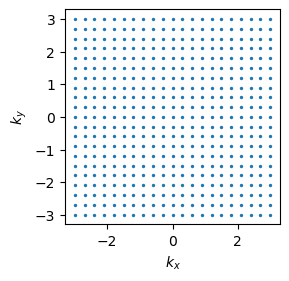

In [17]:
fig1=utils_auto.plot_kspace(kspace=ham.k_space)

## Task 2: Check energy dispersion for non-interacting term

In [18]:
ham = module.HartreeFockHamiltonian(N_shell=10,parameters={'Delta':0,'U_p':0,'U_d':0,'V_pp':0,'V_pd':1e-5,'t_pd':1,'t_pp':1},filling_factor=1/3)


In [19]:
h_nonint = ham.generate_non_interacting()

In [20]:
wf,en= HF.diagonalize(h_nonint) # or HF.diagonalize

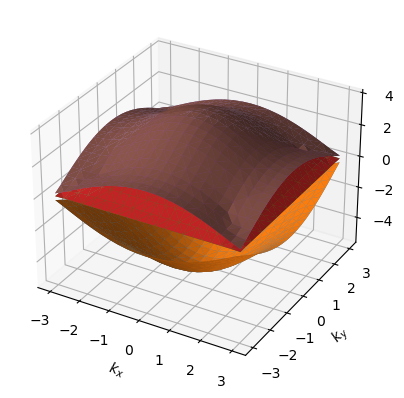

In [21]:
utils_auto.plot_2d_bandstructure(ham,en)

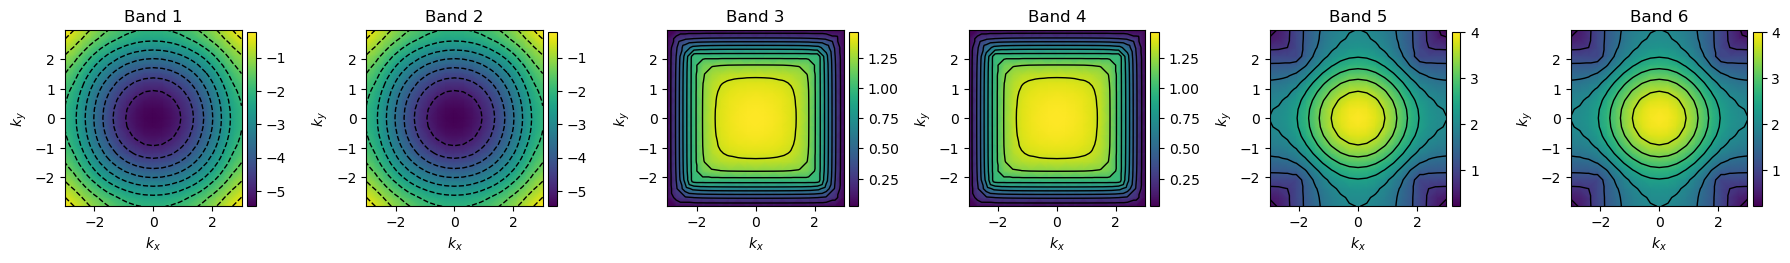

In [22]:
fig2=utils_auto.plot_2d_false_color_map(ham,en)

## Task 3: Infinitesemial U limit

In [23]:
ham_int= module.HartreeFockHamiltonian(N_shell=10,  
parameters={'Delta':5,'U_p':0,'U_d':0,'V_pp':0,'V_pd':1e-5,'t_pd':1,'t_pp':1},filling_factor=1/3)

In [24]:
wf,en= HF.diagonalize(ham_int.generate_non_interacting())
exp_val= HF.get_exp_val(wf,en,1/3,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [25]:
wf_int, en_int, exp_val_int= HF.solve(ham_int,exp_val,100)

Convergence reached at iteration 2


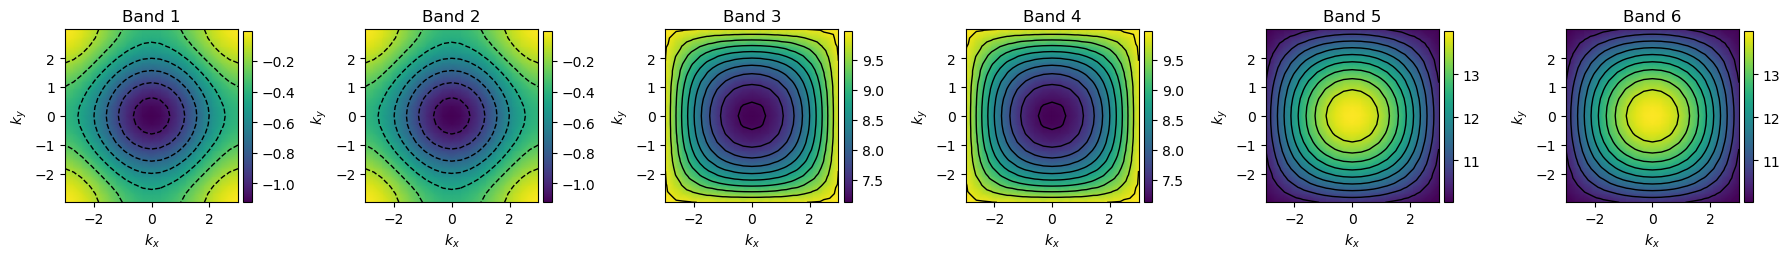

In [26]:
fig3=utils_auto.plot_2d_false_color_map(ham_int,en_int)

## Task 4: Large U limit

In [27]:
ham_int= module.HartreeFockHamiltonian(N_shell=10,  parameters={'Delta':5,'U_p':0,'U_d':0,'V_pp':0,'V_pd':1e5,'t_pd':1,'t_pp':1},filling_factor=1/3)


In [28]:
h_nonint=ham_int.generate_non_interacting()
h_nonint[:,2,:,2,:]-=100
wf,en=HF.diagonalize(h_nonint)
exp_val=HF.get_exp_val(wf,en,1/3,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [29]:
wf_int, en_int, exp_val_int=HF.solve(ham_int,exp_val,99)

Convergence reached at iteration 3


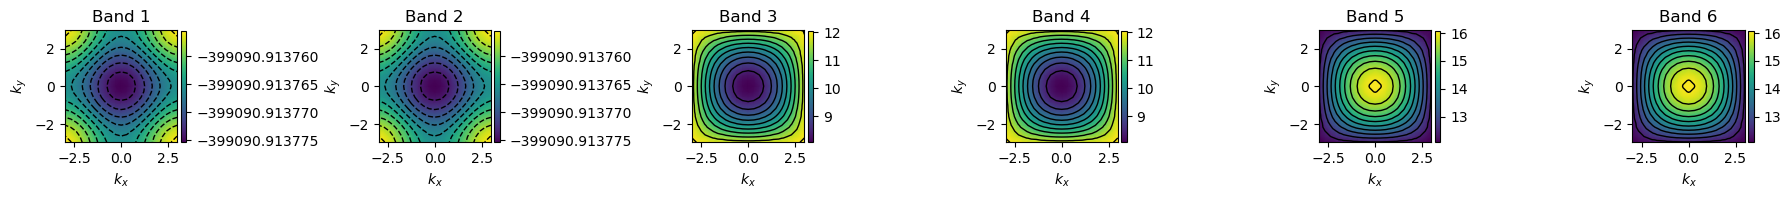

In [30]:
fig4=utils_auto.plot_2d_false_color_map(ham_int,en_int)

In [31]:
utils_auto.print_gap(ham_int,exp_val,en_int,2)

Gap is 399098.97
U/T is 23734.02
mean_U is 24190.30


# Auto eval

## Task 1

In [32]:
result1 = utils_auto.vision_eval(
    fig=fig1, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics1.md', image='image1.md', paper=paper)
    )


#################### THINKING ####################

I need to evaluate the given image based on the rubric, which asks me to check if:
1. The image shows a momentum space mesh in the first Brillouin zone of the concerned problem
2. I need to check the point group symmetry

Let's analyze the image:

The image shows a 2D grid of points (blue dots) in a square region, with axes labeled as $k_x$ and $k_y$. The $k_x$ axis ranges from approximately -3 to 3, and the $k_y$ axis has a similar range. The dots form a regular square grid pattern.

Let's check against the rubric:

1. Momentum space mesh in the first Brillouin zone:
   - The problem describes a square lattice, which has a square first Brillouin zone in momentum space.
   - The image shows a square region with a mesh of points, which aligns with the expected Brillouin zone shape for a square lattice.
   - However, the standard first Brillouin zone for a square lattice should typically range from $-\pi$ to $\pi$ in both $k_x$ and $k_

In [33]:
answer1=utils_auto.extract_result_content(result1['text'])

## Task 2

In [34]:
result2 = utils_auto.vision_eval(
    fig=fig2, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics2.md', image='image2.md', paper=paper)
    )


#################### THINKING ####################

Let me analyze the band structure plots in the image according to the rubric.

1. First, identify the shape of the Brillouin zone boundary and confirm it matches what's expected for a square lattice.

Looking at the image, I can see that each band plot shows a square-shaped region with k_x and k_y axes ranging from approximately -3 to +3. The first Brillouin zone for a square lattice should indeed be square-shaped, so this appears to be consistent with a square lattice.

2. Next, examine the symmetry of the energy distribution shown by the false color plot:

2.1 Identify the highest energy regions (yellow)
- In Bands 1 and 2: The highest energy (least negative, closer to yellow) regions are at the corners of the Brillouin zone.
- In Bands 3 and 4: The highest energy (yellow) regions form a square shape in the center of the Brillouin zone.
- In Bands 5 and 6: The highest energy (yellow) regions are at the center of the Brillouin zone.

In [35]:
answer2=utils_auto.extract_result_content(result2['text'])

## Task 3

In [36]:
result3 = utils_auto.vision_eval(
    fig=fig3, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics3.md', image='image3.md', paper=paper)
    )


#################### THINKING ####################

Let me analyze this image according to the provided rubric:

The image shows six different band structure plots (Band 1 through Band 6) in the first Brillouin zone after a self-consistent Hartree-Fock calculation with infinitesimal interaction.

1. Shape of the Brillouin zone boundary:
   - I can see that each plot shows a square region with k_x and k_y axes extending from approximately -2 to +2. 
   - This square shape is consistent with the expected Brillouin zone for a square lattice, so this point is correct.

2. Symmetry of the energy distribution:

   2.1 Highest energy regions (yellow):
   - In Bands 1-2: The highest energy (yellow) regions are at the corners of the Brillouin zone
   - In Bands 3-4: The highest energy regions are at the edges of the Brillouin zone
   - In Bands 5-6: The highest energy (yellow) regions are at the center of the Brillouin zone

   2.2 Pattern of energy variation:
   - Bands 1-2: Energy decreases 

In [37]:
answer3=utils_auto.extract_result_content(result3['text'])

## Task 4

In [38]:
result4 = utils_auto.vision_eval(
    fig=fig4, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics4.md', image='image4.md', paper=paper,U_int='4*V_pd = 4e5')
    )


#################### THINKING ####################

Let me analyze the image according to the rubric:

1. Identify the shape of the Brillouin zone boundary:
   The plots show a square-shaped Brillouin zone with k_x and k_y axes ranging from approximately -2.5 to 2.5. This matches what's expected for a square lattice.

2. Examine the symmetry of the energy distribution shown by the false color plot:

   2.1 Highest energy regions (yellow):
   - Bands 1-2: The highest energy appears to be in the center (k_x=0, k_y=0)
   - Bands 3-4: The highest energy (yellow) appears at the edges of the Brillouin zone
   - Bands 5-6: The highest energy (yellow) forms a circular region in the center

   2.2 Pattern of energy variation:
   - Bands 1-2: Circular/radial pattern decreasing from center
   - Bands 3-4: Circular/radial pattern increasing toward edges
   - Bands 5-6: Circular pattern with highest energy in the center, decreasing outward

   2.3 Rotational symmetries:
   For bands 1-4, the energ

In [39]:
answer4=utils_auto.extract_result_content(result4['text'])

In [40]:
utils_auto.save_final_answer(paper,trial_idx,answer1,answer2,answer3,answer4)

Final answer record for '3' saved to final_answer.yaml
